In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import time
import random
from tqdm import tqdm as tqdm_progress
from data_preprocess import parse_mnist
from fun_dimin_e import prox, PG, B_PG, SPG, ADMM, B_ADMM, PGRR, init


In [2]:
idx = 53

# 加载初始化数据，u是原始稀疏信号，x0是初始信号，n是信号长度，A_是测量矩阵，Y是测量值，a是分块的测量矩阵，y是分块的测量值
# Ci是误差项系数，这里是0，代表无误差
u, x0, n, A_, Y, a, y, Ci, r, r_i = init(idx=53, Ci=3, dir='reconstructed_signal_dimin_C3')
data_bpg = np.load(f'./reconstructed_signal_dimin_C3/bpg_{idx}.npz')
data_spg = np.load(f'./reconstructed_signal_dimin_C3/spg_{idx}.npz')
data_pgrr = np.load(f'./reconstructed_signal_dimin_C3/pgrr_{idx}.npz')
data_pg = np.load(f'./reconstructed_signal_dimin_C3/pg_{idx}.npz')
data_admm = np.load(f'./reconstructed_signal_dimin_C3/admm_{idx}.npz')
data_badmm = np.load(f'./reconstructed_signal_dimin_C3/badmm_{idx}.npz')

# 加载重构信号
s_pg, e_pg, t_pg = data_pg['s_pg'], data_pg['e_pg'], data_pg['t_pg']
s_bpg, e_bpg, t_bpg = data_bpg['s_bpg'], data_bpg['e_bpg'], data_bpg['t_bpg']
s_spg, e_spg, t_spg = data_spg['s_spg'], data_spg['e_spg'], data_spg['t_spg']
s_admm, e_admm, t_admm = data_admm['s_admm'], data_admm['e_admm'], data_admm['t_admm']
s_badmm, e_badmm, t_badmm = data_badmm['s_badmm'], data_badmm['e_badmm'], data_badmm['t_badmm']
s_pgrr, e_pgrr, t_pgrr = data_pgrr['s_pgrr'], data_pgrr['e_pgrr'], data_pgrr['t_pgrr']


# 这里可以自己修改个别参数
# s_pg, e_pg, t_pg = PG(u, x0, n, A_, Y, Ci, r, lambd=0.00001, step=0.000001, T=150000)
# s_bpg, e_bpg, t_bpg = B_PG(u, x0, n, a, y, Ci, r_i, lambd=0.00001, step=0.000009, T=150000)
# s_spg, e_spg, t_spg = SPG(u, x0, n, a, y, Ci, r_i, lambd=0.00001, step=0.000009, T=150000)
# s_admm, e_admm, t_admm = ADMM(u, x0, n, A_, Y, Ci, r, lambd=0.00001, rho=1000000, T=150000)
# s_badmm, e_badmm, t_badmm = B_ADMM(u, x0, n, a, y, Ci, r_i, lambd=0.00001, rho=1000000, T=150000)
# s_pgrr, e_pgrr, t_pgrr = PGRR(u, x0, n, a, y, Ci, r_i, lambd=0.00001, step=0.000005, T=150000)  

Running B_ADMM: 100%|██████████| 150000/150000 [52:20<00:00, 47.77iteration/s] 


In [8]:
# 保存重构信号
# np.savez(f'./reconstructed_signal_dimin_C3/pg_{idx}.npz', s_pg=s_pg, e_pg=e_pg, t_pg=t_pg)
# np.savez(f'./reconstructed_signal_dimin_C3/bpg_{idx}.npz', s_bpg=s_bpg, e_bpg=e_bpg, t_bpg=t_bpg)
# np.savez(f'./reconstructed_signal_dimin_C3/spg_{idx}.npz', s_spg=s_spg, e_spg=e_spg, t_spg=t_spg)
# np.savez(f'./reconstructed_signal_dimin_C3/pgrr_{idx}.npz', s_pgrr=s_pgrr, e_pgrr=e_pgrr, t_pgrr=t_pgrr)
# np.savez(f'./reconstructed_signal_dimin_C3/admm_{idx}.npz', s_admm=s_admm, e_admm=e_admm, t_admm=t_admm)
# np.savez(f'./reconstructed_signal_dimin_C3/badmm_{idx}.npz', s_badmm=s_badmm, e_badmm=e_badmm, t_badmm=t_badmm)

Assigning font /F1 = '/data/fyy/anaconda3/envs/cs/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
Embedding font /data/fyy/anaconda3/envs/cs/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
Writing TrueType font.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


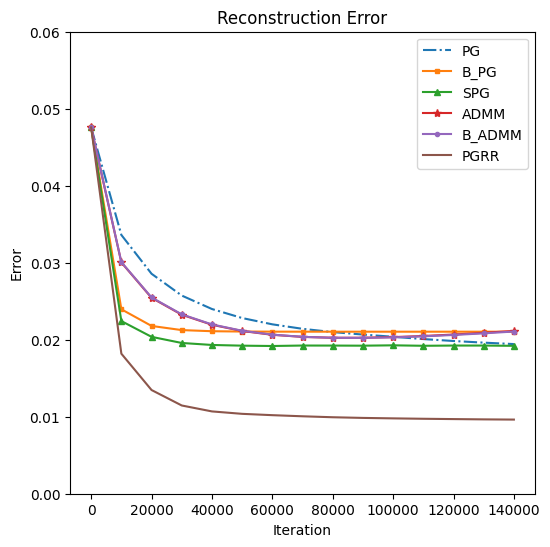

In [6]:
# 绘制误差曲线(随着迭代次数)
plt.figure(figsize=(6, 6))
len_s = 150000

marker_styles = ['.', 's', '^', '*', 'o', '']

# 选择每隔 10 个数据点绘制一次
skip_interval = 10000

plt.plot(np.arange(len_s)[::skip_interval], e_pg[:len_s][::skip_interval], '-'+marker_styles[0], label='PG')
plt.plot(np.arange(len_s)[::skip_interval], e_bpg[:len_s][::skip_interval], '-'+marker_styles[1], markersize=3, label='B_PG')
plt.plot(np.arange(len_s)[::skip_interval], e_spg[:len_s][::skip_interval], '-'+marker_styles[2], markersize=4, label='SPG')
plt.plot(np.arange(len_s)[::skip_interval], e_admm[:len_s][::skip_interval], '-'+marker_styles[3], label='ADMM') 
plt.plot(np.arange(len_s)[::skip_interval], e_badmm[:len_s][::skip_interval], '-'+marker_styles[4], markersize=3,label='B_ADMM')
plt.plot(np.arange(len_s)[::skip_interval], e_pgrr[:len_s][::skip_interval], '-'+marker_styles[5], label='PGRR')


plt.legend()
plt.title('Reconstruction Error')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.ylim(0, 0.06)
plt.savefig('./fig_dimin_C3/Reconstruction_Error_dimin_C3.pdf', format='pdf')
plt.savefig('./fig_dimin_C3/Reconstruction_Error_dimin_C3.eps', format='eps')
plt.show()

Assigning font /F1 = '/data/fyy/anaconda3/envs/cs/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
Embedding font /data/fyy/anaconda3/envs/cs/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
Writing TrueType font.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


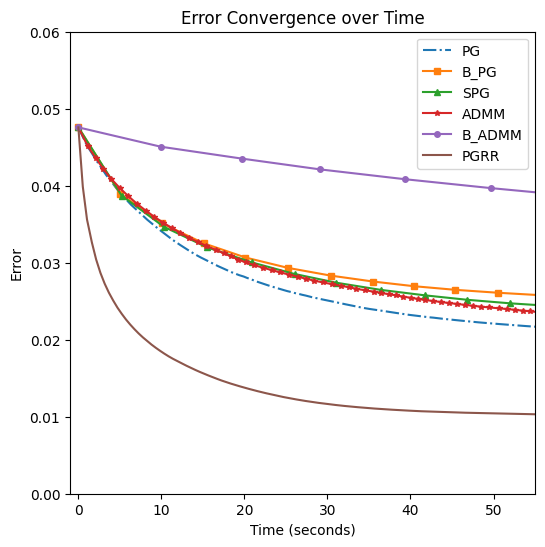

In [7]:
# 绘制误差曲线（随着时间）
plt.figure(figsize=(6, 6))

marker_styles = ['.', 's', '^', '*', 'o', '']

skip_interval = 500

algorithms = {
    'PG': [t_pg, e_pg],
    'B_PG': [t_bpg, e_bpg],
    'SPG': [t_spg, e_spg],
    'ADMM': [t_admm, e_admm],
    'B_ADMM': [t_badmm, e_badmm],
    'PGRR': [t_pgrr, e_pgrr]
}

for i, (algorithm, data) in enumerate(algorithms.items()):
    t_modified = data[0][::skip_interval]
    e_modified = data[1][::skip_interval]
    plt.plot(t_modified, e_modified, '-'+marker_styles[i], label=algorithm, markersize=4)

plt.xlabel('Time (seconds)')
plt.ylabel('Error')
plt.title('Error Convergence over Time')
plt.legend()
plt.xlim(-1, 55)  # 设置x轴范围
plt.ylim(0, 0.06)  # 设置y轴范围
plt.savefig('./fig_dimin_C3/Reconstruction_Error_Time_dimin_C3.pdf', format='pdf')
plt.savefig('./fig_dimin_C3/Reconstruction_Error_Time_dimin_C3.eps', format='eps')
plt.show()